<a href="https://colab.research.google.com/github/JoelBuenrostro/Machine-learning-Operations-Notas-y-Recursos/blob/main/EDA_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **WARNING: CREATE A COPY OF THIS NOTEBOOK BEFORE YOU BEGIN WORKING ON IT**

![alt text](https://moriohcdn.b-cdn.net/ff3cc511fb.png)


This notebook shows an example of a data analysis and the basic Python functions you can leverage to obtain insights from a dataset.

## 1. Import all necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualization
import matplotlib.pyplot as plt             #visualization
%matplotlib inline

**Note:** _%matplotlib inline_  gives the instruction for the output of plotting commands to be displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it.

## 2. Load the data to a Pandas dataframe

The most common format for EDA datasets is CSV files. Using the _read_csv()_ function from Pandas you can read and store the file as a table and assign it to a variable.

In this case, we can call it **data**, but you can assign the significative name that you prefer.

In [ ]:
data = pd.read_csv("healthcare_dataset.csv")

For the purpose of this exercise, we will review the healthcare dataset made public via Kaggle.com: https://www.kaggle.com/datasets/prasad22/healthcare-dataset?select=healthcare_dataset.csv

## 3. Get to know the data

### a. Use and interpret the _shape_ function

In [ ]:
data.shape

(10000, 15)

The dataframe contains 10,000 rows with 15 columns of information.

### b. Use and interpret the _head()_ function

In [ ]:
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


When you run the _head()_ function without arguments, it shows, by default, the first five rows of information. However, you can run it indicating the amount of rows you want to see.

In [ ]:
data.head(10)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
5,Patrick Parker,41,Male,AB+,Arthritis,2020-08-20,Robin Green,Boyd PLC,Aetna,22522.363385,180,Urgent,2020-08-23,Aspirin,Abnormal
6,Charles Horton,82,Male,AB+,Hypertension,2021-03-22,Patricia Bishop,"Wheeler, Bryant and Johns",Cigna,39593.435761,161,Urgent,2021-04-15,Lipitor,Abnormal
7,Patty Norman,55,Female,O-,Arthritis,2019-05-16,Brian Kennedy,Brown Inc,Blue Cross,13546.817249,384,Elective,2019-06-02,Aspirin,Normal
8,Ryan Hayes,33,Male,A+,Diabetes,2020-12-17,Kristin Dunn,"Smith, Edwards and Obrien",Aetna,24903.037270,215,Elective,2020-12-22,Aspirin,Abnormal
9,Sharon Perez,39,Female,O-,Asthma,2022-12-15,Jessica Bailey,Brown-Golden,Blue Cross,22788.236026,310,Urgent,2022-12-16,Aspirin,Normal


### c. Use and interpret the _dtypes_ function

In [ ]:
data.dtypes

Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

The _dtypes_ function enables you to see the type of data that each column contains.

- int64 refers to integer numbers
- float64 refers to floating numbers
- object is a text type or string

Implementing this function you get to know your data better, but you can also detect the need to modify information. For example, sometimes you can find that a datetime column shows up as object. Then you must transform the colum to a datetime type for accurate analysis.

In this case, the date columns were read as objects, so it is best to transform them. You can use the _astype()_ function.

In [ ]:
# transform to datetime values

'''
data["Date of Admission"] = data["Date of Admission"].astype(np.datetime64)
data["Discharge Date"] = data["Discharge Date"].astype(np.datetime64)
'''

# Or

data["Date of Admission"] = pd.to_datetime(data["Date of Admission"], format='%Y-%m-%d')
data["Discharge Date"] = pd.to_datetime(data["Discharge Date"], format='%Y-%m-%d')

In [ ]:
# run dtypes again to confirm
data.dtypes

Name                          object
Age                            int64
Gender                        object
Blood Type                    object
Medical Condition             object
Date of Admission     datetime64[ns]
Doctor                        object
Hospital                      object
Insurance Provider            object
Billing Amount               float64
Room Number                    int64
Admission Type                object
Discharge Date        datetime64[ns]
Medication                    object
Test Results                  object
dtype: object

Additionally, the column Room Number, even though it is a number, it does not represent a quantity. It is bes to treat it as a categorical variable. In this case, you can transform it from integer to object.

In [ ]:
data["Room Number"] = data["Room Number"].astype(object)

In [ ]:
# run dtypes again to confirm
data.dtypes

Name                          object
Age                            int64
Gender                        object
Blood Type                    object
Medical Condition             object
Date of Admission     datetime64[ns]
Doctor                        object
Hospital                      object
Insurance Provider            object
Billing Amount               float64
Room Number                   object
Admission Type                object
Discharge Date        datetime64[ns]
Medication                    object
Test Results                  object
dtype: object

### d. Use and interpret the _describe()_ function

In [ ]:
data.describe()

,Age,Billing Amount
count,10000.000000,10000.000000
mean,51.452200,25516.806778
std,19.588974,14067.292709
min,18.000000,1000.180837
25%,35.000000,13506.523967
50%,52.000000,25258.112566
75%,68.000000,37733.913727
max,85.000000,49995.902283


The describe() function, takes all numeric columns and shows some basic statistics. This enables you to get an overview of the distribution of the data.

## 4. Clean the data

### a. Identify null values with the _isnull()_ function

Use _isnull().sum()_ where the sum indicates to show the total null values for each column.

In [ ]:
data.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

Null values insert noise into visualizations and analysis. You can delete them using the _dropna()_ function.

### b. Find possible outliers

In statistics, an outlier is an observation point distant from other observations. Often, outliers represent data points taken as a mistake or instances of information not representative of the population as a whole. It is good practice to detect these outliers and remove them from the dataset based on an establish rule or threshold.

A common way to observe these outliers is a box plot. A box and whisker plot, also called a box plot, displays the five-number summary of a set of data. The five-number summary is the minimum, first quartile, median, third quartile, and maximum. In a box plot, we draw a box from the first quartile to the third quartile. A vertical line goes through the box at the median. On this type of visualization you can directly observe datapoints that fall outside the overall distribution.

Note this analysis is only for columns that represent quantities.

Below is an example of a boxplot were outliers are clearly visible outside the

<img src="https://www.delftstack.com/img/Seaborn/total%20bill.png" width="400"/>

Now for this dataset.

<Axes: xlabel='Age'>

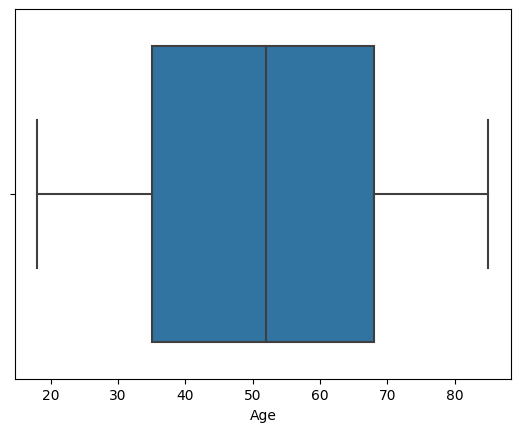

In [ ]:
sns.boxplot(x=data['Age'])

<Axes: xlabel='Billing Amount'>

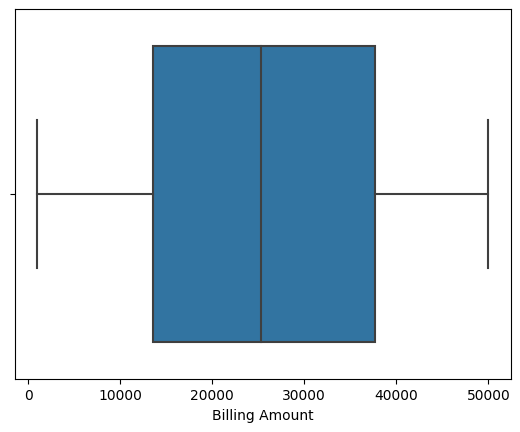

In [ ]:
sns.boxplot(x=data['Billing Amount'])

In the case of this dataset, no evident outliers can be found.

## 5. Explore possible correlations

You can begin by printing the correlation matrix for the numeric variables in your dataset:

In [ ]:
corr_matrix = data.corr()
print(corr_matrix)

                     Age  Billing Amount
Age             1.000000       -0.009483
Billing Amount -0.009483        1.000000


<ipython-input-608-f50fb7f1b89e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


In this case, we only have two numeric variables. A variable has a correlation of 1 with itself. With the other variables, the closer you get to 1 the stronger the correlation is. You can see from this result that the age of the person has no correlation with the billing amount for their medical expenses.

### Heat Maps

One of the best way to find the relationship between the features can be done using heat maps.

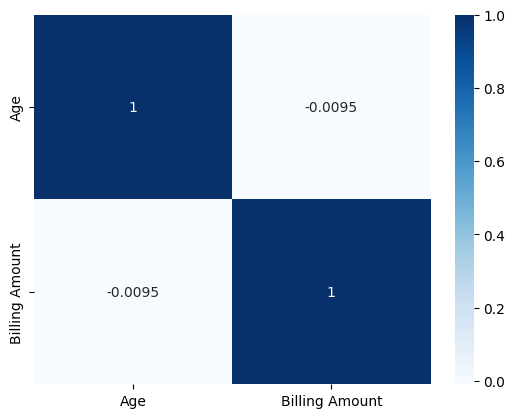

In [ ]:
sns.heatmap(data[['Age','Billing Amount']].corr(), annot=True, cmap = 'Blues')
plt.show()

### Correlation between categorical variables

To establish a possible correlation between categorical variables, is a more complex process. A helpful analysis is Chi Square which you can implement in Python. This [resource](https://analyticsindiamag.com/how-to-use-the-chi-square-test-for-two-categorical-variables/) contains an example.

## Common visualizations

### Variable distributions

It is often helpful and simple to visualize the distribution of values for numeric variables.

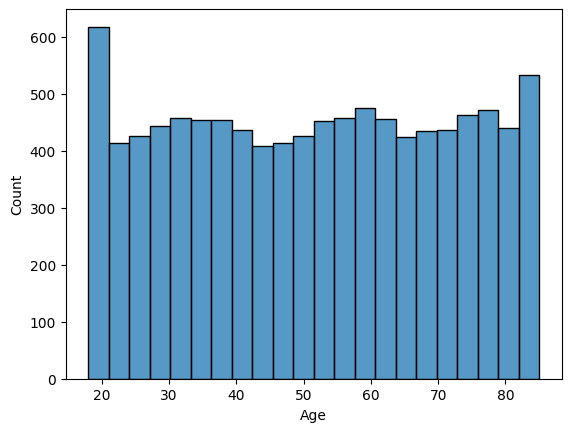

In [ ]:
sns.histplot(data['Age']);

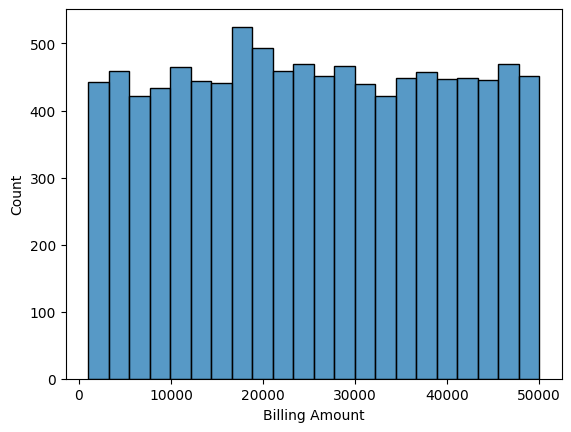

In [ ]:
sns.histplot(data['Billing Amount']);

### Scatter plots

We generally use scatter plots to find the correlation between two variables.

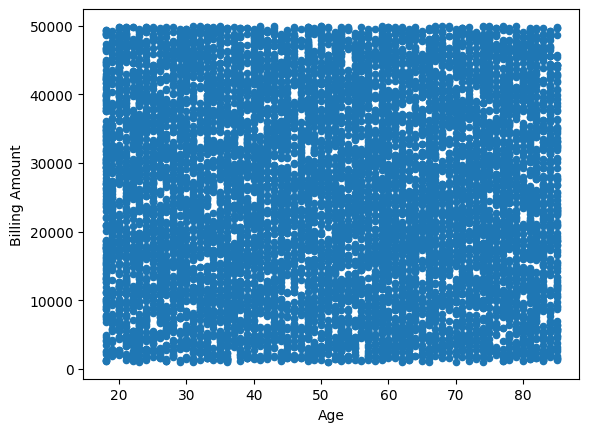

In [ ]:
data.plot.scatter(x="Age",y="Billing Amount")
plt.show()

Because Age and Billing Amount do not show a specific relation, as found by the correlation values, the scatter plot does not show a pattern.

### Visualizations for categorical variables

Note that the dataset in this example is heavy on the categorical variables. For that reason, we will cover some of the most common types of visuals for these values.

#### Bar chart

Bar charts are one of the many techniques used to present data in a visual form so that the reader may readily recognize patterns or trends. Bar charts usually present categorical variables, discrete variables or continuous variables grouped in class intervals.

Review the [documention for Seaborn's options](https://seaborn.pydata.org/generated/seaborn.barplot.html).

With the Seaborn library, you can use counplot to find the frequency of values in a variable.

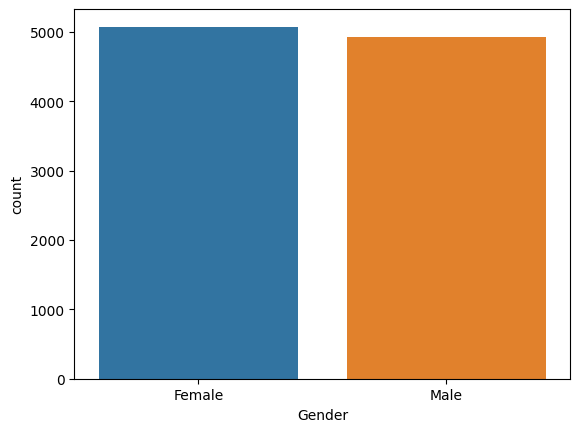

In [ ]:
sns.countplot(data, x="Gender");

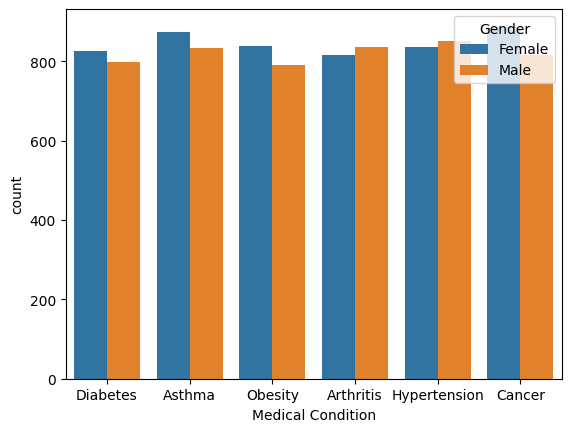

In [ ]:
sns.countplot(data, x="Medical Condition", hue="Gender"); # You can use the value of "hue" to present the information for different categories

You can use barplot to find the values of a variable based on another one.

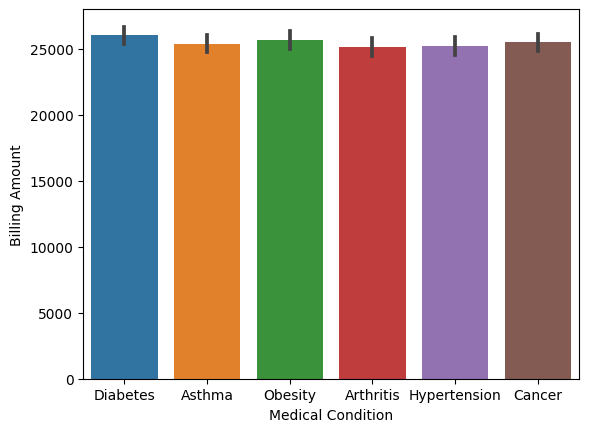

In [ ]:
sns.barplot(data, x="Medical Condition", y="Billing Amount");

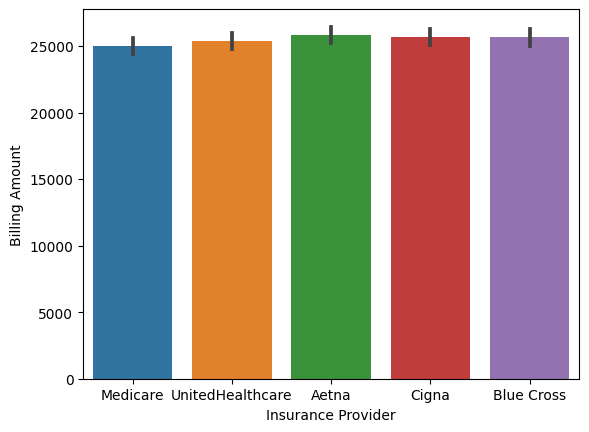

In [ ]:
sns.barplot(data, x="Insurance Provider", y="Billing Amount");

We can observe that the billing amount does not vary greatly based on the type of illness or the insurance people use.

#### Pie chart

A pie chart, sometimes called a circle chart, is a way of summarizing a set of nominal data or displaying the different values of a given variable (e.g. percentage distribution). This type of chart is a circle divided into a series of segments. Each segment represents a particular category.

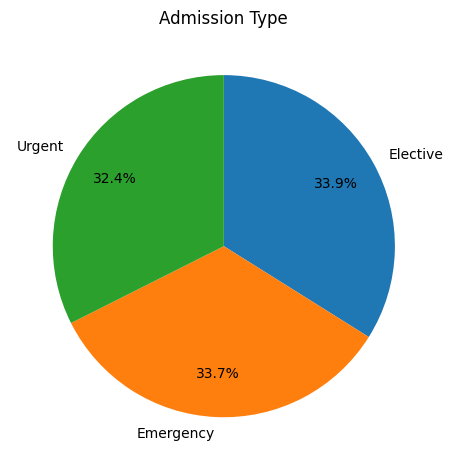

In [ ]:
#compute data for plotting
labels = data['Admission Type'].unique()
values = data['Admission Type'].value_counts()

#plot the chart
fig, ax = plt.subplots()
pie=ax.pie(values, labels=labels, autopct='%1.1f%%', pctdistance = 0.75, counterclock=False, startangle=-270)

#set chart title
ax.set_title('Admission Type')

#adjust chart margin and layout
fig.tight_layout()

#show chart
plt.show()

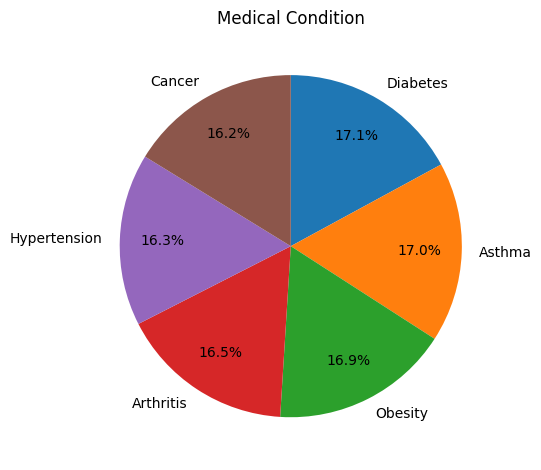

In [ ]:
#compute data for plotting
labels = data['Medical Condition'].unique()
values = data['Medical Condition'].value_counts()

#plot the chart
fig, ax = plt.subplots()
pie=ax.pie(values, labels=labels, autopct='%1.1f%%', pctdistance = 0.75, counterclock=False, startangle=-270)

#set chart title
ax.set_title('Medical Condition')

#adjust chart margin and layout
fig.tight_layout()

#show chart
plt.show()

## Using datetime values

Working with datetimes values can be a little more tricky than other types of variables. Below is just one example of visualization for datetime values, but you can explore documentation and resources to find more ways to represent these values.

In [ ]:
# The following piece of code obtains the total admissions for each month.

datetime = pd.DataFrame([data['Date of Admission'], data['Name']]).transpose()

datetime = (datetime.reset_index()
          .groupby(['Date of Admission','Name'], as_index=False)
          .count()
          .rename(columns={'index':'Total Admissions'})
       )

datetime['Date of Admission'] = pd.to_datetime(datetime["Date of Admission"], format='%Y-%m-%d')

datetime = datetime.groupby(datetime['Date of Admission'].dt.to_period('M')).sum()

datetime.reset_index(drop=False, inplace=True)

datetime.head(15)

<ipython-input-619-83ef81016f47>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datetime = datetime.groupby(datetime['Date of Admission'].dt.to_period('M')).sum()


,Date of Admission,Total Admissions
0,2018-10,8
1,2018-11,145
2,2018-12,150
3,2019-01,178
4,2019-02,138
5,2019-03,152
6,2019-04,180
7,2019-05,165
8,2019-06,167
9,2019-07,181


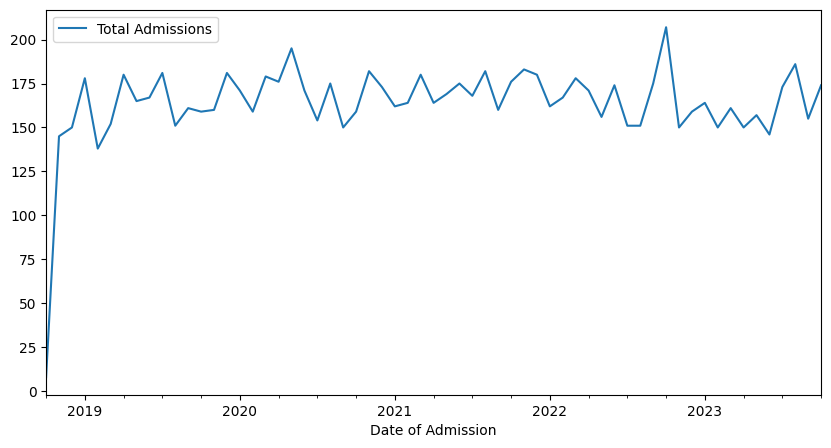

In [ ]:
datetime.plot(x='Date of Admission', y='Total Admissions', figsize=(10, 5));